In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/nnfll B/insurance.csv')

In [5]:
X = dataset.iloc[:,0:6].values
y = dataset.iloc[:,-1].values
X



array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
Or = OrdinalEncoder()
X[:,[1,4,5]]= Or.fit_transform(X[:,[1,4,5]])

In [7]:
X

array([[19, 0.0, 27.9, 0, 1.0, 3.0],
       [18, 1.0, 33.77, 1, 0.0, 2.0],
       [28, 1.0, 33.0, 3, 0.0, 2.0],
       ...,
       [18, 0.0, 36.85, 0, 0.0, 2.0],
       [21, 0.0, 25.8, 0, 0.0, 3.0],
       [61, 0.0, 29.07, 0, 1.0, 1.0]], dtype=object)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1))

In [9]:
X

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ,
        0.66666667],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ,
        0.33333333]])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070, 1)
(268, 1)


In [11]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# model1=LinearRegression().fit(X_train,y_train)
# a=model1.predict(X_train)
# # training_data_prediction = regressor.predict(X_train)
# # r2_train = metrics.r2_score(Y_train,training_data_prediction)
# print('R squared value:', a)
# # testing_data_prediction = regressor.predict(X_test)
# # r2_test = metrics.r2_score(Y_test,testing_data_prediction)
# # print('R squared value:', r2_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential()
model.add(Dense(32, input_dim=6, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 888
Trainable params: 888
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train,y_train, epochs =50, validation_data=(X_test, y_test))

Epoch 1/50
34/34 [==============================] - 1s 7ms/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 7/50
34/34 [======================

In [16]:
acc = history.history['mean_squared_error']
loss = history.history['loss']

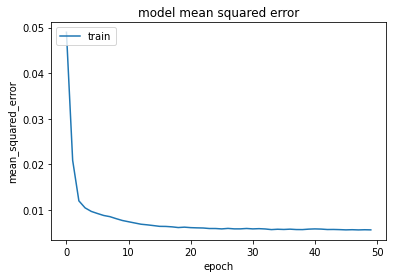

<Figure size 432x288 with 0 Axes>

In [17]:
from matplotlib import pyplot as plt
plt.plot(acc)
plt.title('model mean squared error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('accuracy_curve.png')

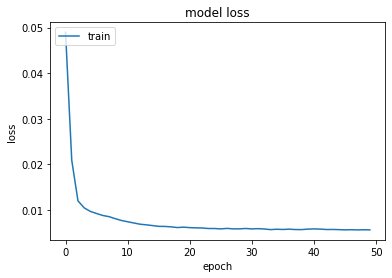

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('loss_curve.png')

In [19]:
history_test = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057


In [20]:
history_test

[0.005694346968084574, 0.005694346968084574]